# SVC : Sign Language Digits

## We charge the Libs

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## we load ours data

In [2]:
x_full = np.load('X.npy')
y_full = np.load('Y.npy')

## We split ours data in train and dev set with a fixed seed

In [3]:
fixed_state = 42
x_train, x_dev = train_test_split(x_full, test_size = 0.3, random_state=fixed_state)
y_train, y_dev = train_test_split(y_full, test_size = 0.3, random_state=fixed_state)

## We reshape the x in a 2d array 

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_dev_flat = x_dev.reshape(x_dev.shape[0], x_dev.shape[1]*x_dev.shape[2])

## We reshape the y 

In [5]:
y_train_flat = [list(y).index(1) for y in y_train]
y_dev_flat = [list(y).index(1) for y in y_dev]

## We initialyse the model
* for SVM we need to had a parameter ex : gamma='scale'

In [6]:
model = SVC(gamma='scale')

## We  fit the model

In [7]:
model.fit(x_train_flat, y_train_flat)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## we get prediction in the dev set

In [8]:
predictions = model.predict(x_dev_flat)
predictions

array([3, 9, 3, 9, 0, 0, 8, 2, 5, 9, 4, 9, 7, 1, 2, 3, 0, 5, 0, 7, 0, 2,
       3, 1, 9, 1, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 1, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 2, 2, 1, 0, 6, 8, 2, 8, 2, 7, 2, 7, 5, 9,
       2, 2, 9, 4, 1, 1, 2, 7, 4, 9, 9, 5, 3, 8, 2, 9, 2, 0, 0, 0, 0, 4,
       1, 2, 5, 3, 7, 4, 7, 4, 2, 2, 8, 9, 2, 0, 9, 0, 3, 1, 8, 8, 8, 7,
       5, 8, 3, 3, 2, 5, 6, 1, 2, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 8, 9, 5, 8, 2, 2, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 5, 2,
       6, 2, 6, 6, 1, 1, 4, 5, 9, 8, 2, 2, 4, 7, 6, 9, 3, 7, 2, 9, 1, 3,
       7, 2, 0, 2, 1, 7, 4, 2, 1, 6, 3, 2, 4, 8, 8, 6, 8, 3, 2, 0, 8, 3,
       8, 1, 4, 7, 0, 2, 2, 4, 2, 5, 8, 8, 9, 0, 2, 8, 5, 3, 1, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 6, 5, 8, 4, 7, 6, 2, 1, 5, 4, 6, 6, 9, 3,
       1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 4, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 4, 9, 2, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 8, 1, 0, 0,

## We count good and bad predictions

In [9]:
predict_ok = []
true = 0
false = 0
for i in range(len(predictions)):
    if predictions[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 518
Nombres de mauvaise prédictions : 101


## We get the confusion matrix 

In [10]:
matrix_conf = confusion_matrix(list(y_dev_flat), predictions)
matrix_conf

array([[54,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 65,  1,  2,  0,  1,  1,  0,  0,  0],
       [ 0,  1, 60,  3,  1,  4,  2,  0,  5,  0],
       [ 0,  1,  5, 51,  1,  0,  2,  0,  3,  0],
       [ 0,  2,  0,  1, 46,  1,  1,  1,  0,  0],
       [ 2,  1,  6,  0,  0, 42,  1,  0,  2,  1],
       [ 2,  1,  9,  7,  0,  1, 41,  0,  1,  3],
       [ 0,  0,  0,  0,  1,  0,  0, 58,  2,  1],
       [ 0,  0,  9,  3,  5,  0,  0,  0, 43,  0],
       [ 1,  0,  0,  0,  0,  0,  2,  0,  0, 58]])

## We display the plot of confusion matrix

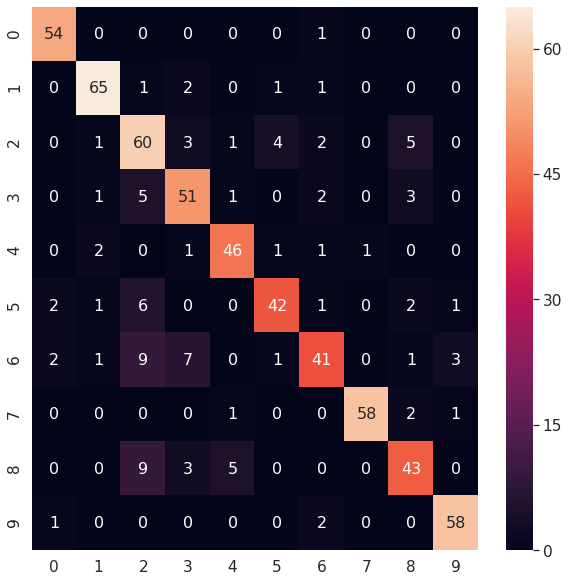

In [11]:
df_cm = pd.DataFrame(matrix_conf, range(10))
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf, annot=True,annot_kws={"size": 16})# font size

plt.show()

## We get the accuracy

In [12]:
accuracy_svm = accuracy_score(y_dev_flat, predictions)
print("L'accuracy SVM - SVC : ",accuracy_svm)

L'accuracy SVM - SVC :  0.8368336025848142


## XGBoost

## We initialyse the model

In [13]:
model = XGBClassifier()

## We  fit the model

In [14]:
model.fit(x_train_flat, y_train_flat)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## we get prediction in the dev set

In [15]:
predictions_xg = model.predict(x_dev_flat)
predictions_xg

array([2, 9, 3, 9, 0, 2, 3, 2, 6, 7, 4, 9, 7, 1, 2, 8, 0, 5, 0, 7, 0, 2,
       3, 1, 9, 2, 7, 3, 5, 9, 6, 5, 4, 6, 8, 6, 3, 1, 9, 2, 8, 8, 4, 1,
       1, 2, 5, 7, 8, 9, 1, 9, 6, 2, 1, 0, 2, 8, 2, 8, 2, 7, 2, 8, 5, 9,
       2, 2, 6, 4, 1, 1, 2, 7, 4, 9, 9, 4, 3, 8, 8, 9, 2, 0, 0, 0, 2, 4,
       1, 4, 5, 4, 7, 4, 7, 4, 2, 2, 8, 9, 4, 0, 9, 0, 2, 1, 8, 2, 8, 7,
       5, 8, 5, 3, 6, 5, 3, 1, 5, 5, 2, 0, 4, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 3, 9, 5, 2, 2, 2, 2, 6, 6, 1, 6, 2, 4, 4, 9, 2, 0, 2,
       6, 2, 2, 6, 4, 1, 7, 4, 9, 8, 5, 2, 4, 7, 6, 9, 3, 7, 2, 9, 1, 6,
       7, 6, 0, 2, 1, 7, 4, 4, 1, 6, 6, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8,
       8, 5, 5, 7, 0, 8, 4, 4, 2, 5, 8, 8, 7, 0, 2, 8, 5, 3, 4, 3, 5, 0,
       6, 4, 3, 1, 7, 6, 4, 1, 7, 5, 8, 4, 7, 6, 2, 1, 2, 4, 6, 3, 5, 3,
       1, 0, 9, 0, 1, 2, 3, 7, 5, 4, 2, 0, 0, 4, 8, 5, 9, 2, 4, 7, 7, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 3, 9, 5, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 3, 3, 0, 0, 0, 8, 0, 6, 5, 2, 1, 0, 0,

## We get the confusion matrix 

In [16]:
matrix_conf_xg = confusion_matrix(list(y_dev_flat), predictions_xg)
matrix_conf_xg

array([[50,  0,  1,  0,  0,  2,  2,  0,  0,  0],
       [ 2, 55,  0,  2,  6,  0,  4,  0,  1,  0],
       [ 0,  0, 56,  1,  5,  4,  5,  0,  5,  0],
       [ 1,  1,  5, 44,  1,  1,  2,  0,  8,  0],
       [ 0,  3,  0,  1, 44,  2,  0,  0,  2,  0],
       [ 0,  0,  6,  0,  6, 38,  4,  0,  1,  0],
       [ 3,  1,  7, 10,  0,  2, 37,  1,  1,  3],
       [ 1,  0,  0,  0,  0,  0,  0, 52,  6,  3],
       [ 0,  0,  7,  7,  5,  0,  2,  1, 38,  0],
       [ 1,  0,  0,  0,  0,  1,  2, 11,  0, 46]])

## We display the plot of confusion matrix

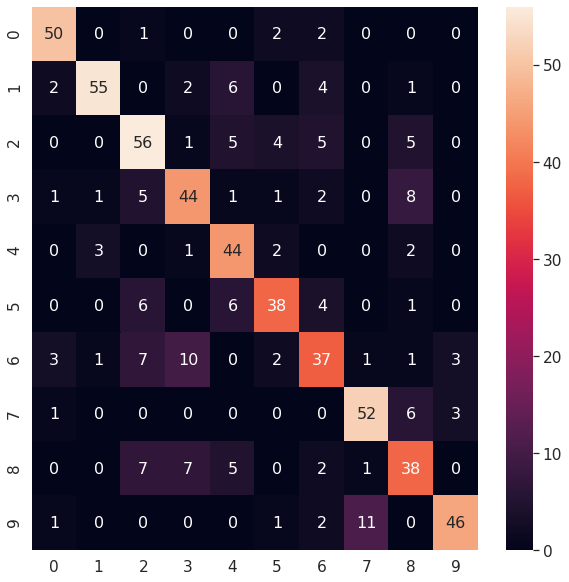

In [17]:
df_cm = pd.DataFrame(matrix_conf_xg, range(10))
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf_xg, annot=True,annot_kws={"size": 16})# font size

plt.show()

## We count good and bad predictions

In [18]:
predict_ok_xg = []
true = 0
false = 0
for i in range(len(predictions_xg)):
    if predictions_xg[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok_xg.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 460
Nombres de mauvaise prédictions : 159


## We get the accuracy

In [19]:
accuracy_xgboost = accuracy_score(y_dev_flat, predictions_xg)
print("L'accuracy XGBoost : ",accuracy_xgboost)

L'accuracy XGBoost :  0.7431340872374798
